In [1]:
import numpy as np
import random
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def fx(x):
    return 20 + x[0]**2 -10*np.cos (2*np.pi*x[0])+ x[1]**2-10*np.cos(2*np.pi*x[1])

In [3]:
def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))

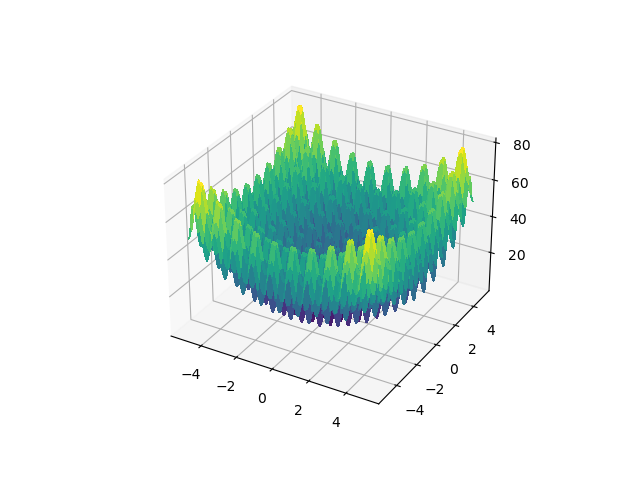

In [4]:
x = np.linspace(-5, 5, 10000)
y = np.linspace(-5, 5, 1000)
xx, yy = np.meshgrid(x, y)
z = 20 + xx**2 -10*np.cos (2*np.pi*xx)+ yy**2-10*np.cos(2*np.pi*yy)

%matplotlib widget
fig = plt.figure();
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.viridis,linewidth=0, antialiased=False);

In [5]:
def initial_population(size_population,nbits,num_var, verbosa=False): 
    """ size_population  = tamaño de la población
       nbists = número de bits de la cadena DNA
    """
    individuos=np.zeros((size_population,nbits,num_var))
    for i in range(size_population):
        for j in range(num_var):
            individuos[i,:,j] = [(random.getrandbits(1)) for number in range(1, nbits+1)]
            if verbosa:
                print("Individuo " +str(i+1)+ " variable "+str(j) + ":  " + str(individuos[i,:,j]))     
    return (individuos)

In [6]:
def fitness(fx,individuos,interval,size_population,nbits,num_var,verbosa=False): 
    """ fx        = función a optimizar
       Individuos = población a evaluar
       interval   = [max y min]
    """
    fitness_population=np.zeros((size_population,)) 
    fitness_prob=np.zeros((size_population,)) 
    max_value=(2**nbits-1)
    for i in range(size_population):
        x=np.zeros((num_var,))
        for j in range(num_var):
            x[j]=binatodeci(individuos[i,:,j])
            x[j]= interval[j,0]+ ((interval[j,1]-interval[j,0])*x[j])/max_value
        fitness_population[i]=fx(x)
        if verbosa:
            print("Individuo " +str(i+1) +":  " + "   f(x)="+ str(fitness_population[i]))    
    mini=np.amin(fitness_population)
    ind_mini=np.argmin(fitness_population)
    if mini<0:
        fitness_prob=np.array(fitness_population-np.amin(fitness_population))
    else:
        fitness_prob=np.array(fitness_population)
        
    fitness_prob=1/(1+fitness_prob)
    fitness_prob=fitness_prob/np.sum(fitness_prob)
    return fitness_population, fitness_prob

In [7]:
def selection(fitness_population, individuos,size_population,num_var,selection_method="tournament",verbosa=False): 
    """ fitness_population  = Evalaución de la población
       fitness_prob = Evalaución de la población inversa y normalizada  
       metodo_seleccion="tournament"
    """
    selected_population=np.zeros((size_population,nbits,num_var))
    if selection_method == "tournament":
        ind_tournament= [random.randint(0, size_population-1) for i in range(size_population)]
        for i,j in zip(range(size_population),ind_tournament):
            mini= np.argmin([ fitness_population[i],fitness_population[j]])
            if mini==0:
                selected_population[i,:,:]=individuos[i,:,:]
                sel=i
            else:
                selected_population[i,:,:]=individuos[j,:,:]
                sel=j
            if verbosa:
                [print("Individuo seleccionado var "+ str(ii)+" : " + str(selected_population[i,:,ii])) for ii in range(num_var)]

                # print("Individuo seleccionado:" +str(np.transpose(selected_population[i,:,:])))    
    return selected_population

In [8]:
def crossover(selected_population, individuos,size_population,nbits,num_var,verbosa=False): 
    """ fitness_population  = Evalaución de la población
       fitness_prob = Evalaución de la población inversa y normalizada  
       metodo_seleccion="tournament"
    """
    pointC= [random.randint(1, nbits-2) for i in range(size_population)]
    
    # [print(selected_population[i]) for i in range(size_population)]
    i=0
    cont_int=0
    new_generation=np.zeros((size_population,nbits,num_var))
    rng = default_rng()
    while i<size_population:
        ind_parents=np.zeros((num_var,2))
        parents= np.zeros((2,num_var,nbits))
        for j in range(num_var):
            ind_parents[j,:] = rng.choice(size_population, size=num_var, replace=False)
            for ii in range(2):
                parents[ii,j,:]=selected_population[int(ind_parents[j,ii]),:,ii]
                # print(selected_population[int(ind_parents[j,ii]),:,ii])#= 
        # selected_population=np.zeros((size_population,nbits,num_var))

        for j in range(num_var):
            new_generation[i,:,j] =np.concatenate((parents[0,j,0:pointC[i]],parents[1,j,pointC[i]:]))

        if verbosa:
            [print("Individuo " + str(i+1)+" seleccionado var: "+ str(ii)+"  " + str(new_generation[i,:,ii])) for ii in range(num_var)]
        i += 1
    individuos=new_generation
    
    return individuos

In [9]:
def mutation(individuos,size_population,nbits, prob_mut=0.02, verbosa=False): 
    """ prob  = probabilidad de mutación debe ser baja
    """
    # [print(individuos[ii]) for ii in range(size_population)]
    dat=np.random.uniform(low=0,high=1,size=(size_popu,nbits,num_var))<0.02
    x,y,z=np.where(dat)
    n_mut= len(x)
    for i,j,k in zip(x,y,z):
        individuos[i,j,k]=1-individuos[i,j,k]
            
    if verbosa:
        print("numbers of mutated bits: " + str(n_mut))
    return individuos

In [10]:
num_var=2
generations = 30
size_popu = 30
nbits=12
interval=np.array([[-5.12,5.12],[-5.12,5.12]])
individuos=initial_population(size_popu,nbits,num_var, verbosa=False)
for i in range(generations):
    fitness_population, fitness_prob=fitness(fx,individuos,interval,size_popu,nbits,num_var,verbosa=False)
    selected_population=selection(fitness_population, individuos,size_popu,num_var,selection_method="tournament",verbosa=False)
    individuos=crossover(selected_population, individuos,size_popu,nbits,num_var,verbosa=False)
    individuos= mutation(individuos,size_popu,nbits, 0.02, verbosa=False)
    individuos=mutation(individuos,size_popu,nbits, prob_mut=0.02, verbosa=False)
    
fitness_population, fitness_prob=fitness(fx,individuos,interval,size_popu,nbits,num_var,verbosa=False)    
ind_mini=np.argmin(fitness_population)

print(ind_mini)
print(individuos.shape)
x=np.zeros((num_var,))
for j in range(num_var):
    t=binatodeci(individuos[ind_mini,:,j])
    x[j]= interval[j,0]+ ((interval[j,1]-interval[j,0])*t)/(2**nbits-1)
        
print(x,fitness_population[ind_mini])

25
(30, 12, 2)
[-0.01125275 -0.01625397] 0.07747904298371466


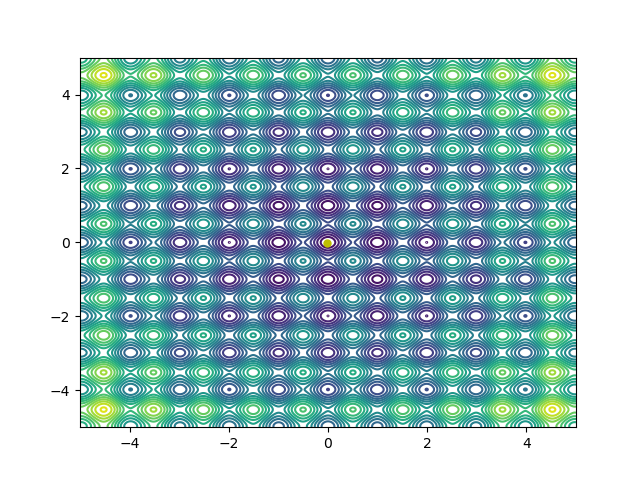

In [11]:

x1 = np.linspace(-5, 5, 10000)
y1 = np.linspace(-5, 5, 1000)
xx, yy = np.meshgrid(x1, y1)
z = 20 + xx**2 -10*np.cos (2*np.pi*xx)+ yy**2-10*np.cos(2*np.pi*yy)
fig = plt.figure();
plt.contour(x1,y1,z,20)
plt.plot(x[0],x[1], 'yo--', linewidth=2, markersize=5)
plt.show()




